In [5]:
import numpy as np
import pandas as pd

In [9]:
data=pd.read_csv(r"C:\Users\Hp\Downloads\train - train (1).csv",delimiter=',')
test=pd.read_csv(r"C:\Users\Hp\Downloads\test - test (1).csv",delimiter=',')

In [10]:
data.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [11]:
df=data.copy()
df.head(7)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
5,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C,0
6,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1


In [45]:
test.shape
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,male,8.00000,1,1,36.7500,S
1,1,female,49.00000,0,0,25.9292,S
2,3,male,29.70056,0,0,7.7375,Q
3,2,female,24.00000,2,1,27.0000,S
4,1,male,36.00000,0,0,26.2875,S


In [13]:
df.shape

(668, 11)

In [15]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [20]:
df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Survived', ylabel='count'>

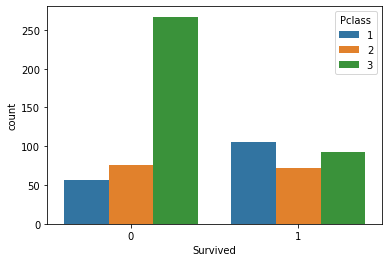

In [24]:
sns.countplot(x='Survived',hue='Pclass',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

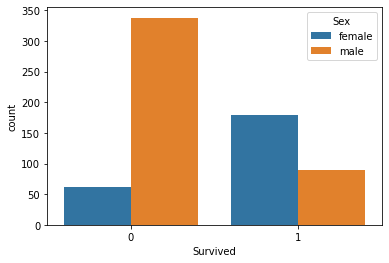

In [26]:
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

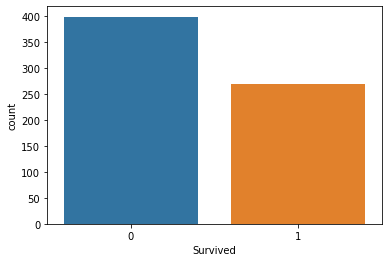

In [27]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

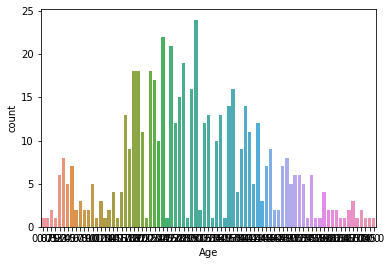

In [28]:
sns.countplot(x='Age',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

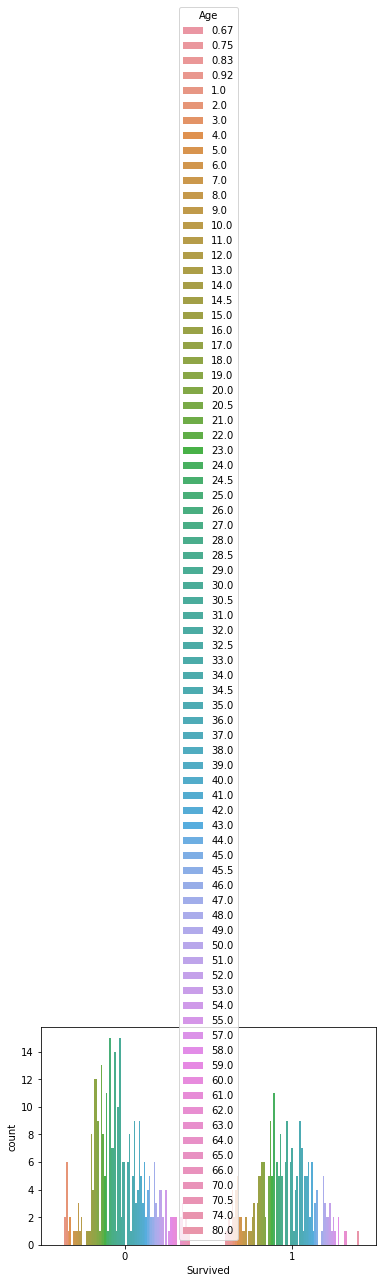

In [29]:
sns.countplot(x='Survived',hue='Age',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

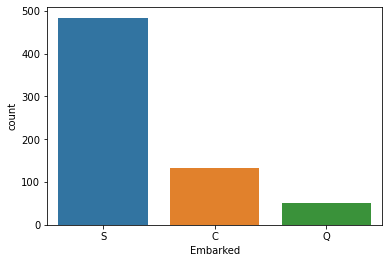

In [34]:
sns.countplot(x='Embarked',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

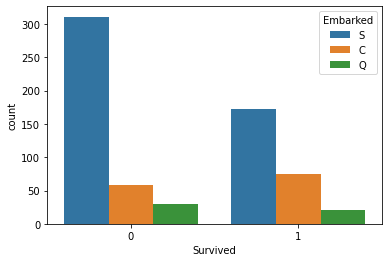

In [36]:
sns.countplot(x='Survived',hue='Embarked',data=df)

In [33]:
df.Age.fillna(df.Age.mean(),inplace=True)
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)


In [54]:
def f(s):
    if s=='male':
        return 0
    else:
        return 1
def f1(s):
    if s=='S':
        return 0
    elif s=='C':
        return 1
    else:
        return 2
def f2(s):
    if s<=10:
        return 0
    elif s>10 and s<=20:
        return 1
    elif s>20 and s<=30:
        return 2
    else:
        return 3
    
    

In [52]:
df['sex']=df['Sex'].apply(f)
df['Embarked']=df['Embarked'].apply(f1)
df.Embarked.fillna('S',inplace=True)
df.drop(['Sex'],axis=1,inplace=True)
df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived,sex
0,2,29.00000,1,0,26.000,2,1,1
1,3,29.70056,0,0,8.050,2,0,0
2,2,39.00000,0,0,26.000,2,0,0
3,3,29.00000,0,4,21.075,2,0,1
4,3,25.00000,0,0,7.050,2,0,0


In [55]:
df['Age']=df['Age'].apply(f2)

In [57]:
df.drop(['Fare'],axis=1,inplace=True)
df.head()

,Pclass,Age,SibSp,Parch,Embarked,Survived,sex
0,2,2,1,0,2,1,1
1,3,2,0,0,2,0,0
2,2,3,0,0,2,0,0
3,3,2,0,4,2,0,1
4,3,2,0,0,2,0,0


In [58]:
test['Age']=test['Age'].apply(f2)

In [59]:
test.drop(['Fare'],axis=1,inplace=True)
test.head()

,Pclass,Age,SibSp,Parch,Embarked,sex
0,2,0,1,1,0,0
1,1,3,0,0,0,1
2,3,2,0,0,2,0
3,2,2,2,1,0,1
4,1,3,0,0,0,0


In [40]:
df.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
sex         0
dtype: int64

In [42]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          45
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       173
Embarked      1
dtype: int64

In [49]:
test.Age.fillna(test.Age.mean(),inplace=True)
test['sex']=test['Sex'].apply(f)
test['Embarked']=test['Embarked'].apply(f1)
test.Embarked.fillna('S',inplace=True)
test.drop(['Sex'],axis=1,inplace=True)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,sex
0,2,8.00000,1,1,36.7500,0,0
1,1,49.00000,0,0,25.9292,0,1
2,3,29.70056,0,0,7.7375,2,0
3,2,24.00000,2,1,27.0000,0,1
4,1,36.00000,0,0,26.2875,0,0


In [60]:
x=df.drop('Survived',axis=1)
y=df['Survived']
clf.fit(x,y)

LogisticRegression()

In [68]:
y_pred=clf.predict(x)
y_pred.shape

(668,)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       423
           1       0.69      0.76      0.72       245

    accuracy                           0.79       668
   macro avg       0.77      0.78      0.78       668
weighted avg       0.79      0.79      0.79       668



In [70]:
clf.score(x,y)

0.7874251497005988

In [72]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[340  59]
 [ 83 186]]
